In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Telco_customer_churn.xlsx')
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [3]:
print(df.dtypes)

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object


In [4]:
#Ensured the numeric columns
num_cols = ['Tenure Months','Monthly Charges','Total Charges', 
            'Churn Value', 'Churn Score', 'CLTV']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

print(df[num_cols].dtypes)

Tenure Months        int64
Monthly Charges    float64
Total Charges      float64
Churn Value          int64
Churn Score          int64
CLTV                 int64
dtype: object


In [5]:
df.shape

(7043, 33)

In [6]:
df.drop_duplicates()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.50,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.90,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [7]:
df.isna().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [8]:
#filled the Total charges
df['Total Charges'] = df['Total Charges'].fillna(
    df['Tenure Months'] * df['Monthly Charges'])

In [9]:
#LabelEncoder for binary categorical data
binary_cols = ['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines',
            'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 
           'Streaming TV', 'Streaming Movies', 'Paperless Billing','Churn Label']
le = LabelEncoder()

for col in binary_cols:
    df[col] = le.fit_transform(df[col])

df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,1,Mailed check,53.85,108.15,1,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,1,Electronic check,70.70,151.65,1,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,1,Electronic check,99.65,820.50,1,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,1,Electronic check,104.80,3046.05,1,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,1,Bank transfer (automatic),103.70,5036.30,1,1,89,5340,Competitor had better devices


In [10]:
#OneHotEncoder for multi-class features
from sklearn.preprocessing import OneHotEncoder

multiclass_data = ['Internet Service','Contract', 'Payment Method']

#Initialize the oneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

#Fit the encoder to the data and transform it
encoded_data = encoder.fit_transform(df[multiclass_data])

# Create meaningful new column names
new_cols = encoder.get_feature_names_out(multiclass_data)

# Build a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=new_cols, index=df.index)

# Drop the original columns
df_encoded = pd.concat([df.drop(columns=multiclass_data), encoded_df], axis=1)

print(df_encoded)

      CustomerID  Count        Country       State          City  Zip Code  \
0     3668-QPYBK      1  United States  California   Los Angeles     90003   
1     9237-HQITU      1  United States  California   Los Angeles     90005   
2     9305-CDSKC      1  United States  California   Los Angeles     90006   
3     7892-POOKP      1  United States  California   Los Angeles     90010   
4     0280-XJGEX      1  United States  California   Los Angeles     90015   
...          ...    ...            ...         ...           ...       ...   
7038  2569-WGERO      1  United States  California       Landers     92285   
7039  6840-RESVB      1  United States  California      Adelanto     92301   
7040  2234-XADUH      1  United States  California         Amboy     92304   
7041  4801-JZAZL      1  United States  California  Angelus Oaks     92305   
7042  3186-AJIEK      1  United States  California  Apple Valley     92308   

                    Lat Long   Latitude   Longitude  Gender  ..

In [11]:
#Scale features using StandardScaler()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
print(df[num_cols].head())

   Tenure Months  Monthly Charges  Total Charges  Churn Value  Churn Score  \
0      -1.236724        -0.362660      -0.958066     1.663829     1.268402   
1      -1.236724         0.197365      -0.938874     1.663829     0.385650   
2      -0.992402         1.159546      -0.643789     1.663829     1.268402   
3      -0.177995         1.330711       0.338085     1.663829     1.175481   
4       0.677133         1.294151       1.216150     1.663829     1.407784   

       CLTV  
0 -0.981675  
1 -1.436462  
2  0.821409  
3  0.509483  
4  0.794358  


In [12]:
print(df[['Tenure Months','Monthly Charges','Total Charges',
          'Churn Value','Churn Score','CLTV']].mean())
print(df[['Tenure Months','Monthly Charges','Total Charges',
          'Churn Value','Churn Score','CLTV']].std())


Tenure Months     -1.614182e-17
Monthly Charges   -5.649637e-17
Total Charges     -4.842546e-17
Churn Value        0.000000e+00
Churn Score        1.291346e-16
CLTV              -2.824818e-16
dtype: float64
Tenure Months      1.000071
Monthly Charges    1.000071
Total Charges      1.000071
Churn Value        1.000071
Churn Score        1.000071
CLTV               1.000071
dtype: float64


In [13]:
drop_cols = ['CustomerID', 'Lat Long', 'Churn Label', 'Churn Reason']
X = df.drop(columns=drop_cols, errors='ignore')

# Make sure only numeric or encoded categorical remain
print(X.select_dtypes(include=['object']).columns)


Index(['Country', 'State', 'City', 'Gender', 'Internet Service', 'Contract',
       'Payment Method'],
      dtype='object')


In [14]:
print(X.columns.tolist())

['Count', 'Country', 'State', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Value', 'Churn Score', 'CLTV']


In [15]:
from sklearn.preprocessing import LabelEncoder

# Encode all object/string columns
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

In [16]:
print(X.dtypes.value_counts())

int32      19
float64     8
int64       2
Name: count, dtype: int64


In [17]:
y = df['Churn Value'].astype(int)

In [18]:
print(y.unique()[:20])   # first 20 unique values
print(y.dtype)

[1 0]
int32


In [19]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X, y)

RandomForestClassifier(n_estimators=200, random_state=42)

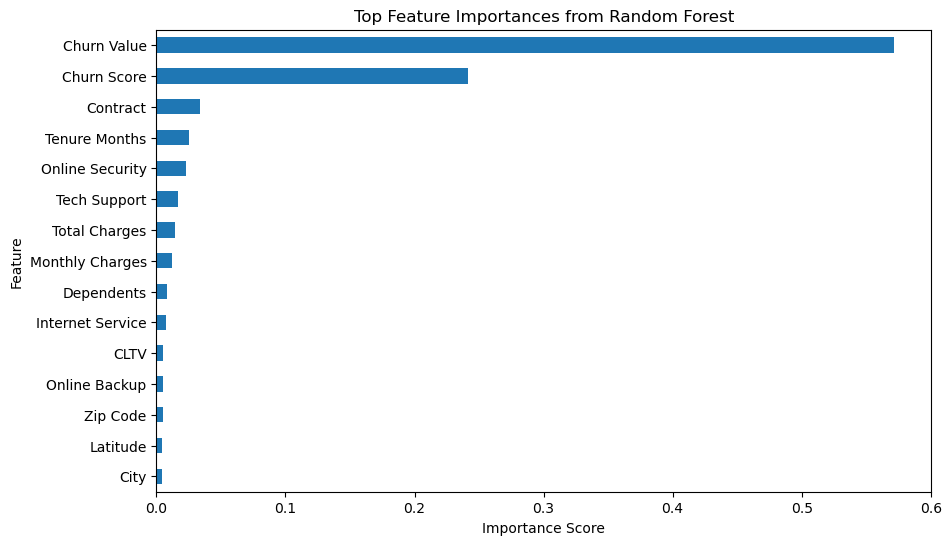

Churn Value         0.571908
Churn Score         0.241112
Contract            0.033861
Tenure Months       0.025221
Online Security     0.023103
Tech Support        0.017113
Total Charges       0.014697
Monthly Charges     0.012430
Dependents          0.008104
Internet Service    0.007258
CLTV                0.005431
Online Backup       0.005194
Zip Code            0.004769
Latitude            0.004533
City                0.004395
dtype: float64


In [20]:
# Feature importances
importances = rf_model.feature_importances_
features = X.columns
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

# Show top 15
plt.figure(figsize=(10,6))
feat_imp.head(15).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top Feature Importances from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Print for reference
print(feat_imp.head(15))

In [21]:
# Force drop leakage columns
leakage_cols = ['Churn Value', 'Churn Score', 'Churn Label', 'Churn Reason', 'CustomerID', 'Lat Long']
X = df.drop(columns=leakage_cols, errors='ignore')

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# Target
y = df['Churn Value'].astype(int)

print("Remaining columns in X:", X.columns.tolist()[:15])  # show first 15


Remaining columns in X: ['Count', 'Country', 'State', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service']


In [22]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X, y)

importances = rf_model.feature_importances_
features = X.columns
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

print("Top 15 features:\n", feat_imp.head(15))

Top 15 features:
 Total Charges       0.099029
Tenure Months       0.097683
Monthly Charges     0.097193
CLTV                0.074618
Contract            0.073515
City                0.070373
Zip Code            0.070367
Latitude            0.069248
Longitude           0.068256
Tech Support        0.038562
Online Security     0.037742
Dependents          0.030129
Payment Method      0.028067
Internet Service    0.023508
Online Backup       0.019166
dtype: float64


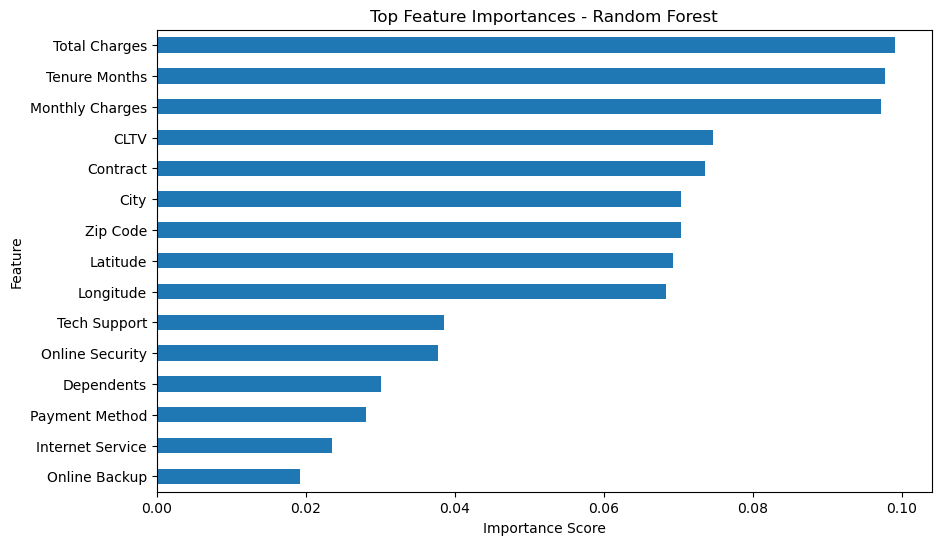

In [23]:
plt.figure(figsize=(10,6))
feat_imp.head(15).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

In [27]:
import joblib

# Save model
joblib.dump(rf_model, "Telco_Customer_churn.pkl")

# Load model
loaded_model = joblib.load("Telco_Customer_churn.pkl")
